# Willkommen im Jupyter Notebook
Mit diesem Notebook könnt ihr Schritt für Schritt Text und Python-Code zur Erstellung  von Mathplotlib-Diagrammen erstellen und ausführen. Es ist dazu gedacht mit GPT erstellten Mathplotlibcode zu testen und zu verwenden.

Dies ist eine Zelle im Markdown Format. Sie enthält einfach Text. Dieser kann mit Markdown formatiert werden und dient dazu, dass ihr euer Vorgehen für euch selbst beschreiben könnt.

Probiert es einfach einmal aus. Fügt unter dieser Zeile eine weiter Textzelle ein und beschreibt kurz euer Vorhaben.

## Code Zellen
Dies nächste Zelle die Python-Code enthält. 
Mit dem Play-Button oder Shift+Enter wird dieser ausgeführt und das Ergebnis
darunter angezeigt.

Die Zelle enthält einen "magischen" Code, damit dieses Notebook Mathplotlib-Code versteht. Außerdem wird ein Diagrammbeispiel ausgegeben. Sie muss einmal mit Shift+Enter oder dem Play Button ausgeführt werden. Danach sollte darunter ein einfaches Diagramm als Beispiel angezeigt werden.

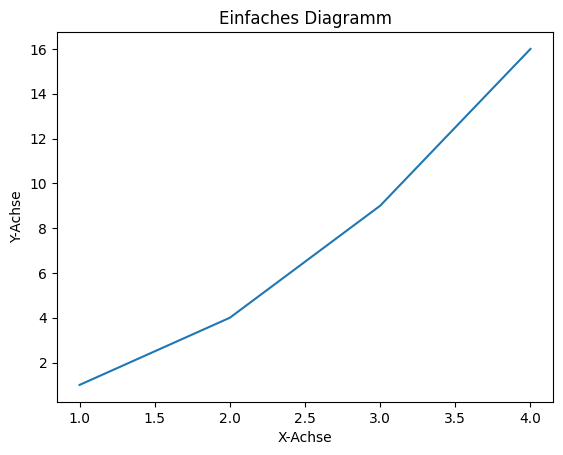

In [18]:
# Installation der Matplotlib, falls diese noch nicht vorhanden ist
!pip install matplotlib
# Import der Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Einfaches Diagramm erstellen
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.title('Einfaches Diagramm')
plt.show()

Du siehst das Diagramm? Wunderbar, dann hat alles geklappt und du kannst weitere Zellen hinzufügen und in diese deinen eigenen Mathplotlib-Code einfügen und ausführen, um deine eigenen Diagramme angezeigt zu bekommnen.

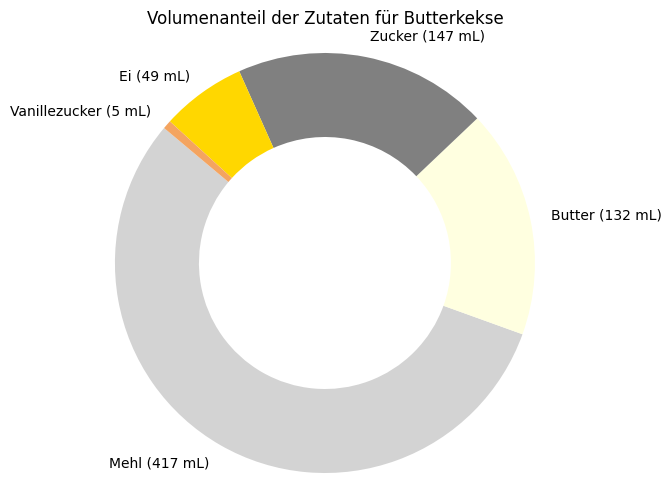

In [6]:
import matplotlib.pyplot as plt

# Zutatennamen und Volumenangaben
zutaten = [
    'Mehl (417 mL)',
    'Butter (132 mL)',
    'Zucker (147 mL)',
    'Ei (49 mL)',
    'Vanillezucker (5 mL)'
]

# Volumenanteile
volumen = [417, 132, 147, 49, 5]

# Farben passend zu den Zutaten
farben = ['lightgrey', 'lightyellow', 'grey', 'gold', 'sandybrown']

# Erstellen des Plots
plt.figure(figsize=(8, 6))
plt.pie(volumen, labels=zutaten, colors=farben, startangle=140, wedgeprops=dict(width=0.4))
plt.title('Volumenanteil der Zutaten für Butterkekse')
plt.axis('equal')  # Kreisförmiger Pie-Chart

# Grafik als SVG speichern
plt.savefig('Rezept Zutatenanteile.svg', format='svg')

plt.show()

# Beispiel Lottozahlen

Installieren der Pandas Bibliothek, eine Bibliothek zur Verwaltung großer Datensätze in einer tabellenartigen Struktur.

In [9]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 48.2 MB/s eta 0:00:00:00:01


## Prompt zur Codegenerierung
*Wie importiere ich einen CSV Datensatz in einen weiter verwendbaren Datensatz in ein Juypter Notebook. Der Datensatz kann mit der URL https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD heruntergeladen werden.*

In [10]:
import pandas as pd

# URL des Datensatzes
url = "https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD"

# CSV-Datensatz in einen DataFrame laden
df = pd.read_csv(url)

# Den DataFrame anzeigen
print(df.head())

    Draw Date    Winning Numbers  Multiplier
0  09/26/2020  11 21 27 36 62 24         3.0
1  09/30/2020  14 18 36 49 67 18         2.0
2  10/03/2020  18 31 36 43 47 20         2.0
3  10/07/2020  06 24 30 53 56 19         2.0
4  10/10/2020  05 18 23 40 50 18         3.0


### Prompt zur Codegenerierung
*Bitte bereite meinen Datensatz aus dem Pandas Dataframe DF so auf, dass es eine Zeile pro gezogener Kugel gibt. Diese soll das Datum der Ziehung und den Wert der Kugel beinhalten. Sowie eigenen Spalten für das Jahr, den Monat und den Tag der Ziehung. Die Struktur meines bisherigen Datensatzes ist:*
```    Draw Date    Winning Numbers  Multiplier
0  09/26/2020  11 21 27 36 62 24         3.0
1  09/30/2020  14 18 36 49 67 18         2.0
2  10/03/2020  18 31 36 43 47 20         2.0
3  10/07/2020  06 24 30 53 56 19         2.0
4  10/10/2020  05 18 23 40 50 18         3.0

In [11]:
import pandas as pd# Beispiel-Daten als DataFrame

# Konvertiere das Datum zu einem Datetime-Objekt
df['Draw Date'] = pd.to_datetime(df['Draw Date'])

# Neue Spalten für Jahr, Monat, Tag hinzufügen
df['Year'] = df['Draw Date'].dt.year
df['Month'] = df['Draw Date'].dt.month
df['Day'] = df['Draw Date'].dt.day

# Den DataFrame so transformieren, dass jede Kugel in einer separaten Zeile ist
rows = []
for index, row in df.iterrows():
    balls = row['Winning Numbers'].split()
    for ball in balls:
        rows.append({
            'Draw Date': row['Draw Date'],
            'Ball': int(ball),
            'Year': row['Year'],
            'Month': row['Month'],
            'Day': row['Day']
        })

# Ein neuer DataFrame mit den aufgeteilten Daten
df_expanded = pd.DataFrame(rows)

# Ausgabe zur Kontrolle
print(df_expanded)

       Draw Date  Ball  Year  Month  Day
0     2020-09-26    11  2020      9   26
1     2020-09-26    21  2020      9   26
2     2020-09-26    27  2020      9   26
3     2020-09-26    36  2020      9   26
4     2020-09-26    62  2020      9   26
...          ...   ...   ...    ...  ...
10381 2025-01-11     6  2025      1   11
10382 2025-01-11    32  2025      1   11
10383 2025-01-11    37  2025      1   11
10384 2025-01-11    65  2025      1   11
10385 2025-01-11     4  2025      1   11

[10386 rows x 5 columns]


## Prompt zur Codegenerierung
*Erstelle für diesen neuen Dataframe eine farbige Heatmap mit Hilfe der Mathplotlib. Von links nach rechts sollen die einzelnen Kugeln aufgeführt sein. Von oben nach unten soll es eine Zeile pro Jahr geben. Die letzte Zeile soll eine Heatmap für den gesamten Zeitraum beinhalten.*

Die erste Ausführung hat bei mir einen Fehler ergeben. Die Seborn Bibliothek war noch nicht installiert. Dies holt die nächste Zelle nach. Den Code zur Installation habe ich von der textgenerierenden KI durch eine Nachfrage mit der Fehlermeldung nach dem ersten Versuch bekommen. Erst in der Zelle danach ist der Code aus dem Prompt zur Erstellung der Heatmap, nach einer Aufforderung diesen passgenau für die bereits vorhandenen Daten zu machen:

*Dein Code beinhaltet einen Beispieldatensatz. Allerdings arbeite ich in einem Juypter Notebook und habe bereits meinen Datensatz df_expanded, der verwendet werden soll, bitte passe den Code an.*

In [13]:
!pip install seaborn

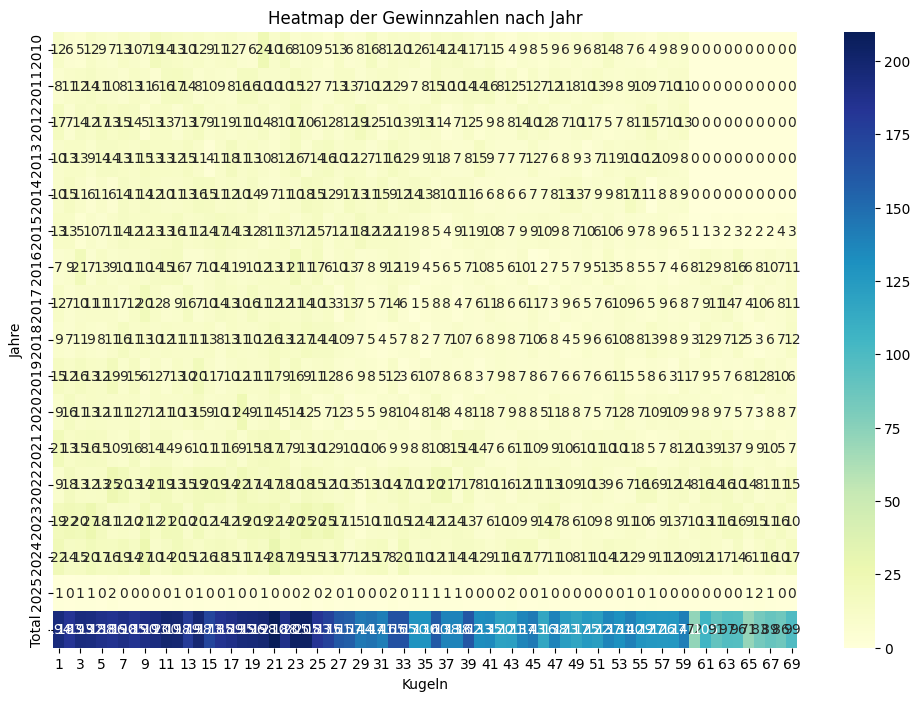

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: df_expanded ist bereits vorhanden und hat die erforderlichen Spalten 'Year' und 'Ball'

# Erstellen einer Kreuztabelle
heatmap_data = pd.crosstab(df_expanded['Year'], df_expanded['Ball'])

# Aggregiere über alle Jahre für die letzte Zeile
total_counts = df_expanded['Ball'].value_counts().sort_index()

# Füge die kumulative Zeile zur Kreuztabelle hinzu
heatmap_data.loc['Total'] = total_counts

# Zeichne die Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap der Gewinnzahlen nach Jahr')
plt.xlabel('Kugeln')
plt.ylabel('Jahre')
plt.show()

## Prompt zur Codegenerierung
*Bitte lasse im Plot in den Zellen jeweils die Häufigkeit weg. Außerdem soll die Heatmap eine Schattierung von Weiß über Hellgrün bis Dunkelrot verwenden.  Die Jahreszahlen sollen horizontal und nicht vertikal sein und in 5 Jahresschritten, ebenfalls hätte ich gerne 5er Schritte für die Skala der Kugeln.*

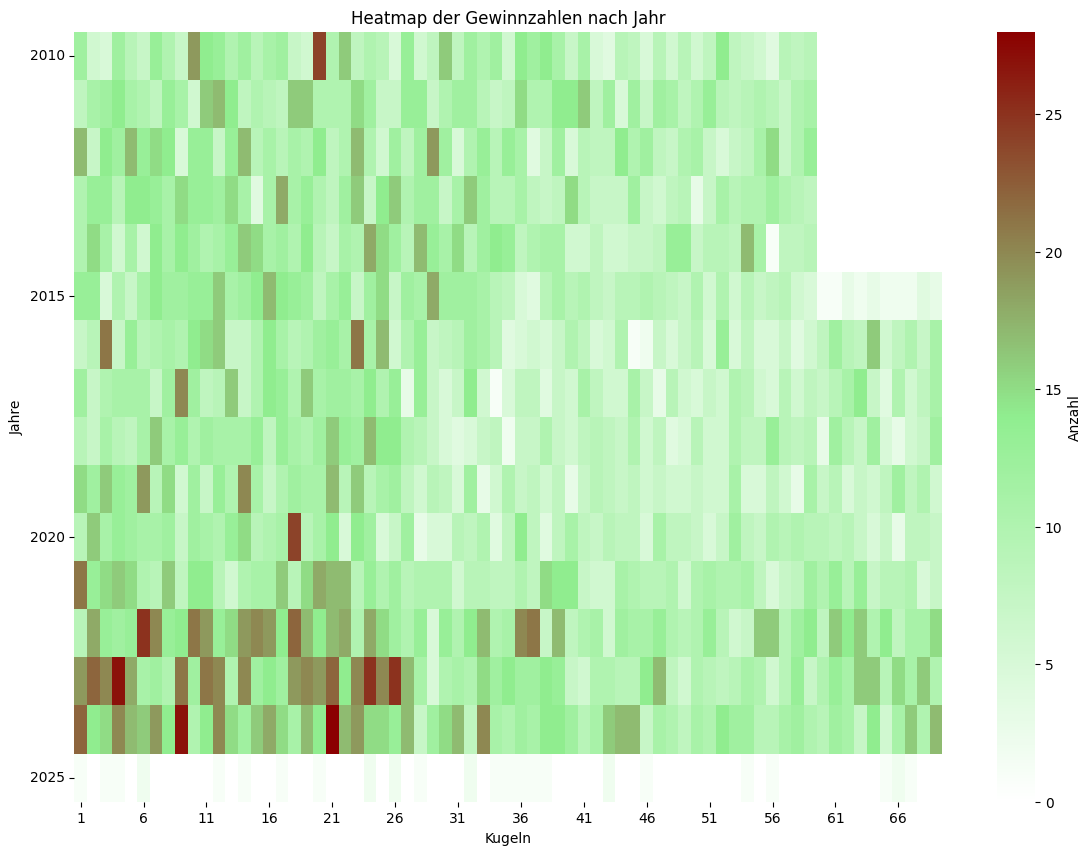

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Annahme: df_expanded ist bereits vorhanden und hat die erforderlichen Spalten 'Year' und 'Ball'

# Erstellen einer Kreuztabelle
heatmap_data = pd.crosstab(df_expanded['Year'], df_expanded['Ball'])

# Zeichne die Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data, 
    cmap=sns.blend_palette(["white", "lightgreen", "darkred"], as_cmap=True),
    cbar_kws={'label': 'Anzahl'},  # Farbbalken Beschriftung
    xticklabels=5,  # Kugelnachsen in 5er-Schritte
    yticklabels=5   # Jahrachsen in 5er-Schritte
)

plt.xticks(rotation=0)  # Kugelnummern horizontal lassen
plt.yticks(rotation=0)  # Jahreszahlen horizontal anzeigen
plt.xlabel('Kugeln')
plt.ylabel('Jahre')
plt.title('Heatmap der Gewinnzahlen nach Jahr')
plt.show()